In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# melihat variable target
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Data Cleansing

In [4]:
# check terdapat missing value atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.duplicated().sum()

0

C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

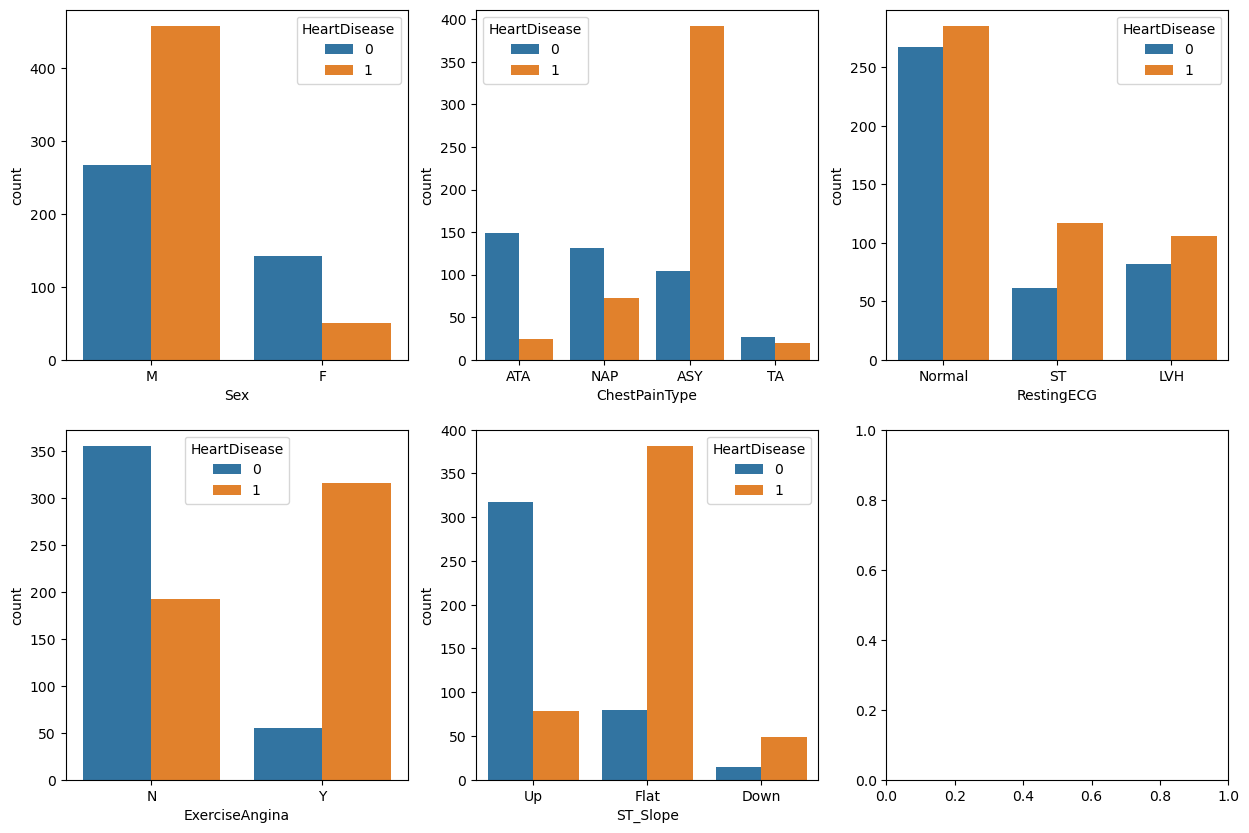

In [11]:
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for cat, ax in zip(cat_features, axes.flatten()):
    sns.countplot(cat, data=df, hue='HeartDisease', ax=ax)
plt.show()

C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


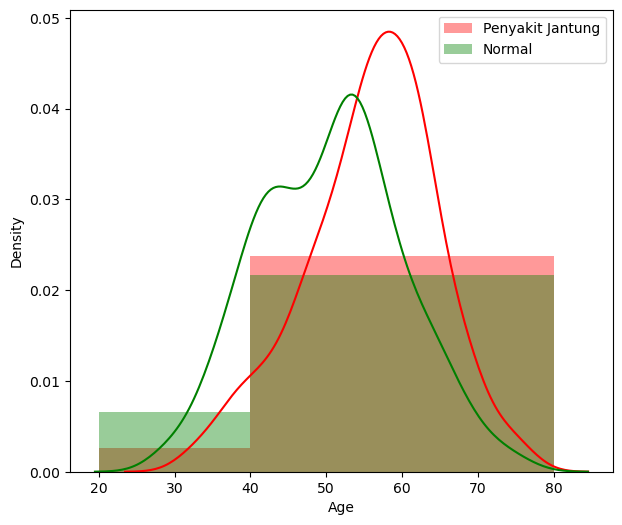

In [66]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df['HeartDisease'] == 1], bins=[20, 40, 80], color='r', label='Penyakit Jantung')
sns.distplot(df.Age[df['HeartDisease'] == 0], bins=[20, 40, 80], color='g', label='Normal')
plt.legend()
plt.show()

Berdasarkan dari visualisasi diatas saya mendapatkan informasi bahwa orang yang rawan terkena serangan jantung itu di usia 43 tahun<br>
sampai dengan 80 tahun. Sedangkan dibawah usia tersebut hampir semua memiliki jantung yang sehat.

In [30]:
## Mencari informasi berdasarkan kecepatan detak jantung
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


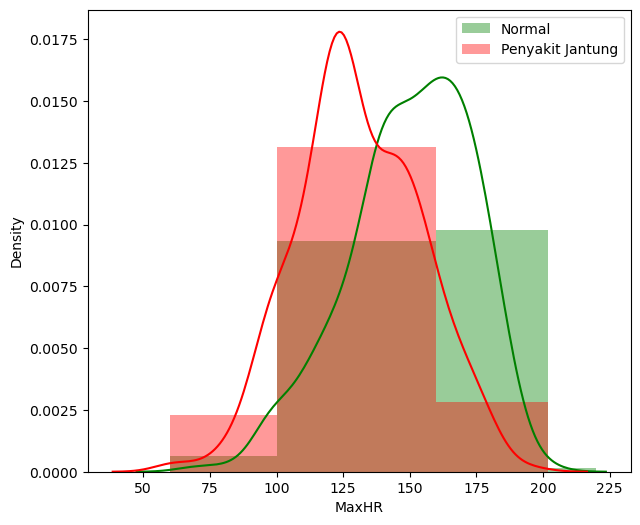

In [62]:
plt.figure(figsize=(7,6))
sns.distplot(df.MaxHR[((df['HeartDisease'] == 0) & (df['Age'] <= 60))], bins=[60, 100, 160, 202, 220], color='g', label='Normal')
sns.distplot(df.MaxHR[((df['HeartDisease'] == 1) & (df['Age'] <= 60))], bins=[60, 100, 160, 202, 220], color='r', label='Penyakit Jantung')
plt.legend()
plt.show()

Dari visualisasi data diatas saya mendapatkan informasi bahwa kecepatan detak jantung rentang dengan penyakit jantung justru dibawah 175.<br>
sedangkan detak jantung orang normal antara 175 sampai dengan 220.

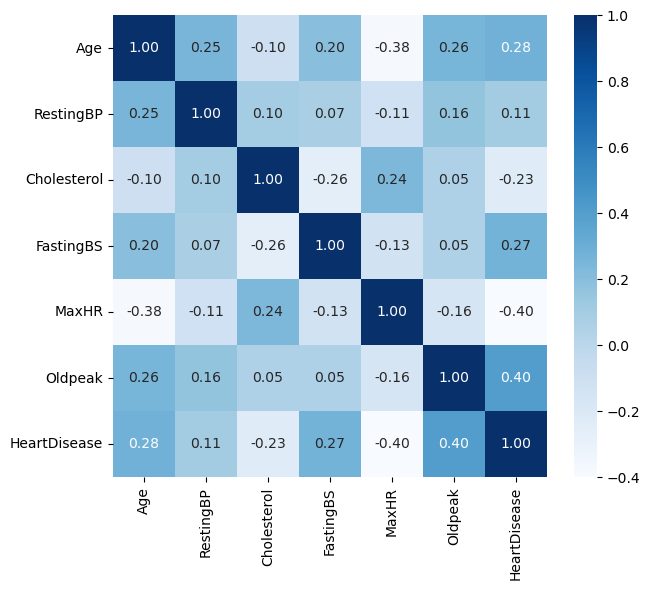

In [61]:
corr_matrix = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, cbar=True, cmap='Blues', fmt=".2f")
plt.show()

In [89]:
df_baru = df.copy()

In [91]:
df_baru['Age'] = pd.cut(df_baru['Age'], bins=[20, 40, 80], labels=['Dewasa', 'Lansia'])

In [98]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    category
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    int64   
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 80.0+ KB


## Train Test Split

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [139]:
X = df_baru.drop(columns='HeartDisease')
y = df['HeartDisease'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((780, 11), (138, 11), (780,), (138,))

In [140]:
features_cat = X_train[["Age", "Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]]
dummies_train = pd.get_dummies(features_cat)
dummies_test = pd.get_dummies(X_test[["Age", "Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])

In [141]:
X_train.drop(columns=["Age", "Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], inplace=True)
X_test.drop(columns=["Age", "Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], inplace=True)
X_train_dummies = pd.concat([X_train, dummies_train], axis='columns')
X_test_dummies = pd.concat([X_test, dummies_test], axis='columns')

In [142]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_dummies)

In [156]:
svc = SVC(max_iter=500)

param = {
    "C": np.logspace(-3, 3, 7),
    "gamma": np.logspace(-3, 3, 7),
    "kernel": ['linear', 'rbf']
}

grid_search = GridSearchCV(svc, param, cv=3, n_jobs=-1, scoring='f1', verbose=1)
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(max_iter=500), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

In [150]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [158]:
grid_search.score(X_train_std, y_train), grid_search.best_score_, grid_search.score(scaler.transform(X_test_dummies), y_test)

(0.8782707622298066, 0.8783807278682912, 0.8974358974358975)

In [152]:
print(y_test[30:51])

[1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0]


In [151]:
grid_search.predict(scaler.transform(X_test_dummies[30:51]))

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [159]:
X_test_10 = X_test_dummies[:10].copy()

In [160]:
X_test_10['target'] = grid_search(scaler.transform(X_test[:10]))

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age_Dewasa,Age_Lansia,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
29,125,188,0,145,0.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
615,130,322,0,109,2.4,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
383,110,0,0,156,0.0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
783,138,236,0,152,0.2,0,1,1,0,1,...,0,0,1,0,0,0,1,0,1,0
684,108,243,0,152,0.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
316,105,0,1,148,0.3,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
326,110,0,0,138,-0.1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
147,120,249,0,176,0.0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
257,150,160,0,172,0.0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
351,140,0,0,140,0.5,0,1,0,1,1,...,0,0,0,0,1,0,1,0,0,1
